# 面向对象设计方法-基于Python

## 面向对象编程3大特性

1. 封装
2. 继承
3. 多态


## 面向对象相关概念


1. 类(Class): 用来描述具有相同的属性和方法的对象的集合。它定义了该集合中每个对象所共有的属性和方法。对象是类的实例。
2. 方法：类中定义的函数。
3. 类变量：类变量在整个实例化的对象中是公用的。类变量定义在类中且在函数体之外。类变量通常不作为实例变量使用。
4. 数据成员：类变量或者实例变量用于处理类及其实例对象的相关的数据。
5. 方法重写：如果从父类继承的方法不能满足子类的需求，可以对其进行改写，这个过程叫方法的覆盖（override），也称为方法的重写。
6. 局部变量：定义在方法中的变量，只作用于当前实例的类。
7. 实例变量：在类的声明中，属性是用变量来表示的，这种变量就称为实例变量，实例变量就是一个用 self 修饰的变量。
8. 继承：即一个派生类（derived class）继承基类（base class）的字段和方法。继承也允许把一个派生类的对象作为一个基类对象对待。例如，有这样一个设计：一个Dog类型的对象派生自Animal类，这是模拟"是一个（is-a）"关系（例图，Dog是一个Animal）。
9. 实例化：创建一个类的实例，类的具体对象。
10. 对象：通过类定义的数据结构实例。对象包括两个数据成员（类变量和实例变量）和方法。


**面向对象**是一种软件**建模**方法。模型是用来解决实际问题的。类似的还有**面向过程**。

建模的对象是一个待求解的问题。建模的目的是解决该问题。

下面通过一个例子来说明。

## 随机游走问题

有一个醉汉站在一条由七块连续的砖组成的小路上，路的两边分别有两个水坑。假设醉汉只能站在某一块砖上，不会站在两块砖中间。将砖从左到右编号为$\{1,2,\ldots,7\}$。

醉汉如果向左走，则会站在比当前砖块编号小1的砖块上。醉汉如果向右走，则会站在比当前砖块编号大1的砖块上。例如，如果醉汉在4号砖上，左走则会到达3号砖上，右走则会到达5号砖上。

1号砖左面以及7号砖右面有两个水沟。如果醉汉在1号砖向左走或7号砖时向右走，则会摔倒并停止移动。

醉汉向左向右的概率都是0.5

问：醉汉从4号砖还是移动，已知到摔倒停止移动的步数的期望是多少？

使用蒙特卡洛方法解决上述问题。

## UML


## 类的定义

```python
class <类名>:
    <类定义>
```

### 类的实例化

```python
<实例名>= <类名>(<初始化参数>)
```

类是看不到的，只能看到类的实例。

In [1]:
class Person:
    pass

x = Person()

print(type(x))

<class '__main__.Person'>


### 类的属性



In [2]:
# ############### 定义 ###############    
class Goods:

    @property
    def price(self):
        return 88
# ############### 调用 ###############
obj = Goods()
result = obj.price  # 自动执行 @property 修饰的 price 方法，并获取方法的返回值
print(result)

88


In [4]:
class JustCounter:
    __secret_count = 0  # 私有变量
    public_count = 0    # 公开变量
 
    def count(self):
        self.__secret_count += 1
        self.public_count += 1
        print (self.__secret_count)
 
counter = JustCounter()
counter.count()
counter.count()
print (counter.public_count)
print (counter.__secret_count)  # 报错，实例不能访问私有变量

1
2
2


AttributeError: 'JustCounter' object has no attribute '__secret_count'

面向对象是一种建模方法

建模方法有

1. 面向过程
2. 面向对象
3. 面向逻辑
4. 面向规则
5. 面向约束

对象模型有四个要素：

1. 抽象
2. 封装
3. 模块化
4. 层次结构

不具备上面四个要素就不是面向对象。

三个次要要素:

1. 类型
2. 并发
3. 持久

In [13]:
class Person():
    def __init__(self,init_p=3):
        self.position=init_p
        self.is_fall=False
        
    def right(self):
        self.position=self.position+1
        print("right turn")
    
    def left(self):
        if self.position==1:
            self.is_fall=True
        else:
            self.position=self.position-1
        print("left turn")
    
    def info(self):
        print(f"position:{self.position} fall:{self.is_fall}")
    
p = Person(init_p=1) # 实例化
p.info()
p.left() # 对象的方法的调用
p.info()

position:1 fall:False
left turn
position:1 fall:True


In [3]:
class Student(object):
    __slots__ = ('name', 'age') # 用tuple定义允许绑定的属性名称

s=Student()
s.name=1
print(s.name)
s.score=1

1


AttributeError: 'Student' object has no attribute 'score'

In [11]:
class Student(object):

    @property
    def birth(self):
        return self._birth

    @birth.setter
    def birth(self, value):
        self._birth = value
        print("setter function is running.")

s=Student()
s.birth=1
print(f's.birth={s.birth}')

setter function is running.
s.birth=1


现在，假设我们要增强now()函数的功能，比如，在函数调用前后自动打印日志，但又不希望修改now()函数的定义，这种在代码运行期间动态增加功能的方式，称之为“装饰器”（Decorator）。

In [3]:
def a():
    print("替代函数")

def log(func):
    def wrapper(*args, **kw):
        print('call %s():' % func.__name__)
        print(f'call {func.__name__}():')
        # return func(*args, **kw)
        return a()
    return wrapper

@log
def now():
    print('2015-3-25')

now()

call now():
call now():
替代函数


In [1]:
def log(text):
    def decorator(func):
        def wrapper(*args, **kw):
            print(f'{text}，{func.__name__}():')
            return func(*args, **kw)
        return wrapper
    return decorator

@log('execute')
def now():
    print('2015-3-25')

now()
print(now.__name__)

execute，now():
2015-3-25
wrapper


In [2]:
import functools

def log(func):
    @functools.wraps(func)
    def wrapper(*args, **kw):
        print('call %s():' % func.__name__)
        return func(*args, **kw)
    return wrapper

@log
def now():
    print('2015-3-25')

now()
print(now.__name__)

call now():
2015-3-25
now


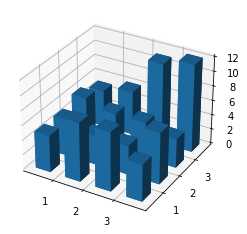

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

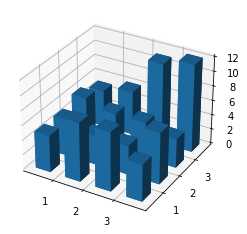

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

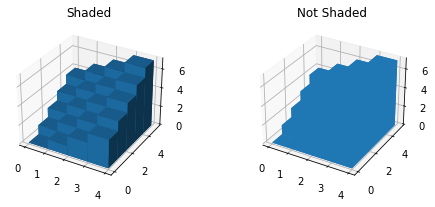

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

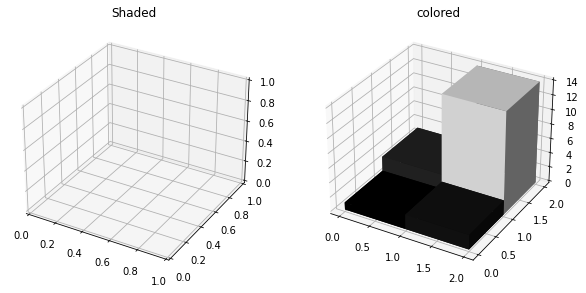

In [22]:
import numpy as np

z_data=np.array([[1,2],[3,14]])
(z_data.max()-z_data.min())/z_data.max()

0.9285714285714286

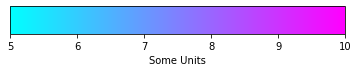

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')